# GPM data combining and conversion

#### Combining the gpm highres nc4 datasets for each year and exporting to a singular classic netcdf dataset (individual for each year) to be used as input for nctoolkits cdo for regridding to lowres dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from dask.distributed import Client, Variable
%matplotlib inline
%config IPCompleter.greedy = True

In [2]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="ticks")

In [3]:
# Colormap selection
xr.set_options(cmap_divergent='RdBu_r', cmap_sequential='Blues')

In [4]:
# Getting the data

client = Client()

mfdataDIR1 = './data/GPM_data/gpm_2000/*.nc4'

ds1 = xr.open_mfdataset(mfdataDIR1, engine = 'netcdf4', combine = 'nested', concat_dim='time', parallel=True) # this is GPM IMERG data

In [5]:
ds1 = ds1.drop_dims(['lonv', 'latv', 'nv'])
ds1 = ds1.transpose('time', 'lat', 'lon')

In [8]:
ds1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [7]:
eager_ds1 = ds1.load()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



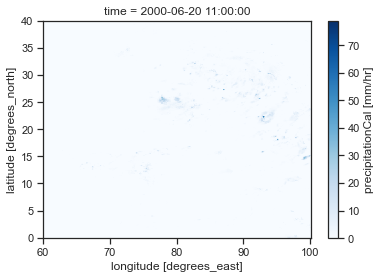

In [9]:
ds1.precipitationCal.sel(time = "2000-06-20 11:00:00").plot()

In [10]:
ds1.to_netcdf('./data/GPM_ncdata/gpm_2000.nc', compute = False) # Check before running

KeyboardInterrupt: 